# Filter Dataset

In [1]:
import json
from sahi.utils.coco import Coco, CocoAnnotation, CocoCategory, CocoImage
from sahi.utils.file import load_json, save_json

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
PATH = '/run/determined/workdir/shared_fs/01 - Users/andrew.mendez/e2e_blogposts/ngc_blog/xview_dataset/train_images_rgb_no_neg/train_640_02.json'
d = json.load(open(PATH,'r'))

In [3]:
d.keys()

dict_keys(['images', 'annotations', 'categories'])

In [4]:
id2name = {i['id']:i['file_name'] for i in d['images']}

In [5]:
# id2name

In [6]:
a = load_json(PATH)

In [7]:
a['annotations'][0]['bbox']

[540.0, 384.0, 100.0, 99.0]

In [8]:
coco = Coco.from_coco_dict_or_path(a)

indexing coco dataset annotations...


Loading coco annotations: 100%|██████████| 15154/15154 [00:53<00:00, 282.91it/s]


In [9]:
# Coco.from_coco_dict_or_path(a)

In [10]:
# create and save coco dict
# coco_dict = create_coco_dict(
#         sliced_coco_images, coco_dict["categories"], ignore_negative_samples=ignore_negative_samples
#     )

In [11]:
coco.json_categories

[{'id': 0,
  'name': 'Fixed-wing Aircraft',
  'supercategory': 'Fixed-wing Aircraft'},
 {'id': 1, 'name': 'Small Aircraft', 'supercategory': 'Small Aircraft'},
 {'id': 2, 'name': 'Cargo Plane', 'supercategory': 'Cargo Plane'},
 {'id': 3, 'name': 'Helicopter', 'supercategory': 'Helicopter'},
 {'id': 4, 'name': 'Passenger Vehicle', 'supercategory': 'Passenger Vehicle'},
 {'id': 5, 'name': 'Small Car', 'supercategory': 'Small Car'},
 {'id': 6, 'name': 'Bus', 'supercategory': 'Bus'},
 {'id': 7, 'name': 'Pickup Truck', 'supercategory': 'Pickup Truck'},
 {'id': 8, 'name': 'Utility Truck', 'supercategory': 'Utility Truck'},
 {'id': 9, 'name': 'Truck', 'supercategory': 'Truck'},
 {'id': 10, 'name': 'Cargo Truck', 'supercategory': 'Cargo Truck'},
 {'id': 11, 'name': 'Truck w/Box', 'supercategory': 'Truck w/Box'},
 {'id': 12, 'name': 'Truck Tractor', 'supercategory': 'Truck Tractor'},
 {'id': 13, 'name': 'Trailer', 'supercategory': 'Trailer'},
 {'id': 14, 'name': 'Truck w/Flatbed', 'supercategor

In [12]:
coco.calculate_stats()
# coco.stats()

In [13]:
coco.stats

{'num_images': 15154,
 'num_annotations': 861692,
 'num_categories': 60,
 'num_negative_images': 0,
 'num_images_per_category': {'Building': 12271,
  'Small Car': 10115,
  'Helicopter': 63,
  'Shipping Container': 364,
  'Truck': 4529,
  'Utility Truck': 1989,
  'Pickup Truck': 831,
  'Facility': 970,
  'Fixed-wing Aircraft': 68,
  'Aircraft Hangar': 175,
  'Cargo Plane': 540,
  'Trailer': 1184,
  'Construction Site': 831,
  'Storage Tank': 664,
  'Small Aircraft': 148,
  'Tower': 114,
  'Bus': 3041,
  'Passenger Vehicle': 849,
  'Shed': 745,
  'Hut/Tent': 237,
  'Cargo Truck': 2521,
  'Damaged Building': 609,
  'Truck w/Box': 1320,
  'Cement Mixer': 135,
  'Vehicle Lot': 2351,
  'Dump Truck': 837,
  'Truck Tractor': 322,
  'Shipping container lot': 641,
  'Mobile Crane': 273,
  'Scraper/Tractor': 73,
  'Front loader/Bulldozer': 521,
  'Haul Truck': 149,
  'Ground Grader': 92,
  'Excavator': 667,
  'Crane Truck': 198,
  'Engineering Vehicle': 234,
  'Truck w/Flatbed': 594,
  'Tower cra

In [14]:
# Filter

In [15]:
image_ids = {}
for image in coco.images:
    image_contains_category = {}
    for annotation in image.annotations:
        if annotation.category_name == 'Fixed-wing Aircraft' or annotation.category_name=='Cargo Plane':
            # print(annotation.category_id)
            # print(image.id, image.file_name,annotation)
            # break
            if image.id in image_ids:
                image_ids[image.id]+=1
            else:
                image_ids[image.id]=1

In [16]:
id_2_coco = {i.id:i for i in coco.images}

In [17]:
ids = list(image_ids.keys())
len(ids)

579

In [18]:
'xview_dataset/train_images_rgb_no_neg/' + id_2_coco[ids[0]].file_name

'xview_dataset/train_images_rgb_no_neg/2315_512_0_1152_640.jpg'

In [19]:
# !ls xview_dataset/train_images_rgb_no_neg/train_images_640_02

In [20]:
!tail -n 1 xview_dataset/train_images_rgb_no_neg/train_images_640_02/2315_512_0_1152_640.jpg

ң([��Vd��*�rB%���JDX]��e�`b�;�s.��(\p:Tbq ��O�EV��ǡL�݁��`:։]�yZR1�oZ#̃���@��������^2Lu�����ۭ>���z��{����`�5`"�UX~`})64���

CocoAnnotation<
    image_id: None,
    bbox: [385.0, 274.0, 17.0, 16.0],
    segmentation: [[385, 274, 385, 290, 402, 290, 402, 274]],
    category_id: 0,
    category_name: Fixed-wing Aircraft,
    iscrowd: 0,
    area: 272>
CocoAnnotation<
    image_id: None,
    bbox: [134.0, 241.0, 57.0, 60.0],
    segmentation: [[134, 241, 134, 301, 191, 301, 191, 241]],
    category_id: 2,
    category_name: Cargo Plane,
    iscrowd: 0,
    area: 3420>
CocoAnnotation<
    image_id: None,
    bbox: [81.0, 226.0, 45.0, 61.0],
    segmentation: [[81, 226, 81, 287, 126, 287, 126, 226]],
    category_id: 2,
    category_name: Cargo Plane,
    iscrowd: 0,
    area: 2745>


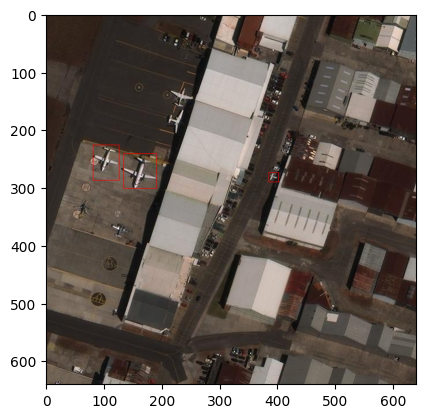

In [21]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
IDX = 11
im = Image.open('xview_dataset/train_images_rgb_no_neg/train_images_640_02/' + id_2_coco[ids[IDX]].file_name)
draw = ImageDraw.Draw(im)
for a in id_2_coco[ids[IDX]].annotations:
    # print(a)
    if a.category_id ==0 or a.category_id ==2:
        x,y,w,h = a.bbox
        print(a)
        draw.rectangle([x,y,x+w,y+h],None,(255,0,0),1)
plt.imshow(im)
plt.show()

In [1]:
import copy
import os
def update_categories(coco,desired_name2id, update_image_filenames=False):
        """
        Rearranges category mapping of given COCO object based on given desired_name2id.
        Can also be used to filter some of the categories.

        Args:
            desired_name2id: dict
                {"big_vehicle": 1, "car": 2, "human": 3}
            update_image_filenames: bool
                If True, updates coco image file_names with absolute file paths.
        """
        # init vars
        currentid2desiredid_mapping = {}
        updated_coco = Coco(
            name=coco.name,
            image_dir=coco.image_dir,
            remapping_dict=coco.remapping_dict,
            ignore_negative_samples=coco.ignore_negative_samples,
        )
        # create category id mapping (currentid2desiredid_mapping)
        for coco_category in copy.deepcopy(coco.categories):
            current_category_id = coco_category.id
            current_category_name = coco_category.name
            if current_category_name in desired_name2id.keys():
                currentid2desiredid_mapping[current_category_id] = desired_name2id[current_category_name]
            else:
                # ignore categories that are not included in desired_name2id
                currentid2desiredid_mapping[current_category_id] = None

        # add updated categories
        for name in desired_name2id.keys():
            updated_coco_category = CocoCategory(id=desired_name2id[name], name=name, supercategory=name)
            updated_coco.add_category(updated_coco_category)

        # add updated images & annotations
        for coco_image in copy.deepcopy(coco.images):
            updated_coco_image = CocoImage.from_coco_image_dict(coco_image.json)
            # update filename to abspath
            file_name_is_abspath = True if os.path.abspath(coco_image.file_name) == coco_image.file_name else False
            if update_image_filenames and not file_name_is_abspath:
                updated_coco_image.file_name = str(Path(os.path.abspath(self.image_dir)) / coco_image.file_name)
            # update annotations
            for coco_annotation in coco_image.annotations:
                # print(coco_annotation)
                current_category_id = coco_annotation.category_id
                desired_category_id = currentid2desiredid_mapping[current_category_id]
                # append annotations with category id present in desired_name2id
                if desired_category_id is not None:
                    # update cetegory id
                    coco_annotation.category_id = desired_category_id
                    # append updated annotation to target coco dict
                    updated_coco_image.add_annotation(coco_annotation)
            updated_coco.add_image(updated_coco_image)

        # overwrite instance
        coco.__class__ = updated_coco.__class__
        coco.__dict__ = updated_coco.__dict__

In [24]:
update_categories(coco,desired_name2id={'Fixed-wing Aircraft':1,'Cargo Plane':2})
coco.calculate_stats()

In [25]:
coco.stats

{'num_images': 15154,
 'num_annotations': 1151,
 'num_categories': 2,
 'num_negative_images': 14575,
 'num_images_per_category': {'Fixed-wing Aircraft': 68, 'Cargo Plane': 540},
 'num_annotations_per_category': {'Fixed-wing Aircraft': 88,
  'Cargo Plane': 1063},
 'min_num_annotations_in_image': 0,
 'max_num_annotations_in_image': 12,
 'avg_num_annotations_in_image': 1.987910189982729,
 'min_annotation_area': 272,
 'max_annotation_area': 62464,
 'avg_annotation_area': 10769.621198957428,
 'min_annotation_area_per_category': {'Fixed-wing Aircraft': 272,
  'Cargo Plane': 324},
 'max_annotation_area_per_category': {'Fixed-wing Aircraft': 15255,
  'Cargo Plane': 62464}}

In [26]:
from sahi.utils.coco import create_coco_dict
cats = coco.json_categories
di = create_coco_dict(coco.images,coco.categories,ignore_negative_samples=True)
di['categories']=coco.json_categories
json.dump(di,open('xview_dataset/train_images_rgb_no_neg/train_640_02_filtered.json','w'))
coco_u = Coco.from_coco_dict_or_path('xview_dataset/train_images_rgb_no_neg/train_640_02_filtered.json')

indexing coco dataset annotations...


Loading coco annotations: 100%|██████████| 579/579 [00:00<00:00, 8181.37it/s]


In [27]:
coco_u.calculate_stats()
coco_u.stats

{'num_images': 579,
 'num_annotations': 1151,
 'num_categories': 2,
 'num_negative_images': 0,
 'num_images_per_category': {'Fixed-wing Aircraft': 68, 'Cargo Plane': 540},
 'num_annotations_per_category': {'Fixed-wing Aircraft': 88,
  'Cargo Plane': 1063},
 'min_num_annotations_in_image': 1,
 'max_num_annotations_in_image': 12,
 'avg_num_annotations_in_image': 1.987910189982729,
 'min_annotation_area': 272,
 'max_annotation_area': 62464,
 'avg_annotation_area': 10769.621198957428,
 'min_annotation_area_per_category': {'Fixed-wing Aircraft': 272,
  'Cargo Plane': 324},
 'max_annotation_area_per_category': {'Fixed-wing Aircraft': 15255,
  'Cargo Plane': 62464}}

In [43]:
coco.calculate_stats()
coco.stats

In [32]:
ids = list(image_ids.keys())
id_2_coco = {i.id:i for i in coco.images}
len(ids)

579

In [33]:
id_2_coco[ids[IDX]]

CocoImage<
    id: 58,
    file_name: 2315_512_0_1152_640.jpg,
    height: 640,
    width: 640,
    annotations: List[CocoAnnotation],
    predictions: List[CocoPrediction]>

CocoAnnotation<
    image_id: None,
    bbox: [45.0, 486.0, 195.0, 154.0],
    segmentation: [[240, 486, 45, 486, 45, 640, 240, 640]],
    category_id: 2,
    category_name: Cargo Plane,
    iscrowd: 0,
    area: 30030>


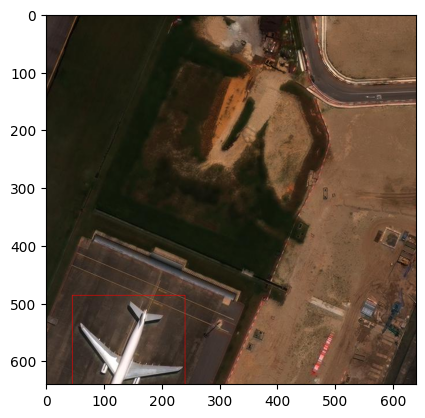

In [42]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
IDX = 225
im = Image.open('xview_dataset/train_images_rgb_no_neg/train_images_640_02/' + id_2_coco[ids[IDX]].file_name)
draw = ImageDraw.Draw(im)
for a in id_2_coco[ids[IDX]].annotations:
    # print(a)
    # if a.category_id ==0 or a.category_id ==2:
    x,y,w,h = a.bbox
    print(a)
    draw.rectangle([x,y,x+w,y+h],None,(255,0,0),1)
plt.imshow(im)
plt.show()

In [131]:
# save_json(coco.json,'xview_dataset/train_images_rgb_no_neg/train_640_02_filtered_negatives.json')

In [138]:
# from typing import Dict, List, Optional, Set, Union
# def remove_invalid_coco_results2(result_list_or_path: Union[List, str], dataset_dict_or_path: Union[Dict, str] = None):
#     """
#     Removes invalid predictions from coco result such as:
#         - negative bbox value
#         - extreme bbox value

#     Args:
#         result_list_or_path: path or list for coco result json
#         dataset_dict_or_path (optional): path or dict for coco dataset json
#     """

#     # prepare coco results
#     if isinstance(result_list_or_path, str):
#         result_list = [load_json(result_list_or_path)]
#     elif isinstance(result_list_or_path, list):
#         result_list = result_list_or_path
#     else:
#         raise TypeError('incorrect type for "result_list_or_path"')

#     # prepare image info from coco dataset
#     if dataset_dict_or_path is not None:
#         if isinstance(dataset_dict_or_path, str):
#             dataset_dict = load_json(dataset_dict_or_path)
#         elif isinstance(dataset_dict_or_path, dict):
#             dataset_dict = dataset_dict_or_path
#         else:
#             raise TypeError('incorrect type for "dataset_dict"')
#         image_id_to_height = {}
#         image_id_to_width = {}
#         for coco_image in dataset_dict["images"]:
#             image_id_to_height[coco_image["id"]] = coco_image["height"]
#             image_id_to_width[coco_image["id"]] = coco_image["width"]

#     # remove invalid predictions
#     fixed_result_list = []
#     for coco_result in result_list:
#         bbox = coco_result["bbox"]
#         # ignore invalid predictions
#         if not bbox:
#             print("ignoring invalid prediction with empty bbox")
#             continue
#         if bbox[0] < 0 or bbox[1] < 0 or bbox[2] < 0 or bbox[3] < 0:
#             print(f"ignoring invalid prediction with bbox: {bbox}")
#             continue
#         if dataset_dict_or_path is not None:
#             if (
#                 bbox[1] > image_id_to_height[coco_result["image_id"]]
#                 or bbox[3] > image_id_to_height[coco_result["image_id"]]
#                 or bbox[0] > image_id_to_width[coco_result["image_id"]]
#                 or bbox[2] > image_id_to_width[coco_result["image_id"]]
#             ):
#                 print(f"ignoring invalid prediction with bbox: {bbox}")
#                 continue
#         fixed_result_list.append(coco_result)
#     return fixed_result_list

In [44]:
# # from sahi.utils.coco import remove_invalid_coco_results

# # remove invalid predictions from COCO results JSON
# coco_results = remove_invalid_coco_results2("xview_dataset/train_images_rgb_no_neg/train_640_02_filtered_negatives.json")

# # export processed COCO results
# save_json(coco_results.json, "xview_dataset/train_images_rgb_no_neg/train_640_02_filtered.json")

# # bonus: remove invalid predictions from COCO results JSON by giving COCO
# # dataset path to also filter out bbox results exceeding image height&width
# # coco_results = remove_invalid_coco_results("coco_result.json", "coco_dataset.json")

In [2]:
import json
from sahi.utils.coco import Coco, CocoAnnotation, CocoCategory, CocoImage
from sahi.utils.file import load_json, save_json
from sahi.utils.coco import create_coco_dict
import copy
import os

def update_categories(coco,desired_name2id, update_image_filenames=False):
        """
        Rearranges category mapping of given COCO object based on given desired_name2id.
        Can also be used to filter some of the categories.

        Args:
            desired_name2id: dict
                {"big_vehicle": 1, "car": 2, "human": 3}
            update_image_filenames: bool
                If True, updates coco image file_names with absolute file paths.
        """
        # init vars
        currentid2desiredid_mapping = {}
        updated_coco = Coco(
            name=coco.name,
            image_dir=coco.image_dir,
            remapping_dict=coco.remapping_dict,
            ignore_negative_samples=coco.ignore_negative_samples,
        )
        # create category id mapping (currentid2desiredid_mapping)
        for coco_category in copy.deepcopy(coco.categories):
            current_category_id = coco_category.id
            current_category_name = coco_category.name
            if current_category_name in desired_name2id.keys():
                currentid2desiredid_mapping[current_category_id] = desired_name2id[current_category_name]
            else:
                # ignore categories that are not included in desired_name2id
                currentid2desiredid_mapping[current_category_id] = None

        # add updated categories
        for name in desired_name2id.keys():
            updated_coco_category = CocoCategory(id=desired_name2id[name], name=name, supercategory=name)
            updated_coco.add_category(updated_coco_category)

        # add updated images & annotations
        for coco_image in copy.deepcopy(coco.images):
            updated_coco_image = CocoImage.from_coco_image_dict(coco_image.json)
            # update filename to abspath
            file_name_is_abspath = True if os.path.abspath(coco_image.file_name) == coco_image.file_name else False
            if update_image_filenames and not file_name_is_abspath:
                updated_coco_image.file_name = str(Path(os.path.abspath(self.image_dir)) / coco_image.file_name)
            # update annotations
            for coco_annotation in coco_image.annotations:
                # print(coco_annotation)
                current_category_id = coco_annotation.category_id
                desired_category_id = currentid2desiredid_mapping[current_category_id]
                # append annotations with category id present in desired_name2id
                if desired_category_id is not None:
                    # update cetegory id
                    coco_annotation.category_id = desired_category_id
                    # append updated annotation to target coco dict
                    updated_coco_image.add_annotation(coco_annotation)
            updated_coco.add_image(updated_coco_image)

        # overwrite instance
        coco.__class__ = updated_coco.__class__
        coco.__dict__ = updated_coco.__dict__
        
## Final filter function
def filter_and_save_dataset(coco_json_path,
                            desired_name2id=None,
                            name_of_new_coco_json=None):
    '''
    '''
    #(Andrew 7.13.2023) Note: coco.update_categories does not check if 
    print("Loading {}...".format(coco_json_path))
    coco = Coco.from_coco_dict_or_path(coco_json_path)
    print("Done!")
    update_categories(coco,desired_name2id=desired_name2id)
    coco.calculate_stats()
    cats = coco.json_categories
    di = create_coco_dict(coco.images,coco.categories,ignore_negative_samples=True)
    di['categories']=coco.json_categories
    json.dump(di,open(name_of_new_coco_json,'w'))
    print("Saving {}...".format(name_of_new_coco_json))
    coco_u = Coco.from_coco_dict_or_path(name_of_new_coco_json)
    print("Saved!")
    print("Coco Stats:")
    print(coco_u.stats)

coco_json_path='/run/determined/workdir/shared_fs/01 - Users/andrew.mendez/e2e_blogposts/ngc_blog/xview_dataset/train_images_rgb_no_neg/train_640_02.json'
desired_name2id={'Fixed-wing Aircraft':1,'Cargo Plane':2}
name_of_new_coco_json = 'xview_dataset/train_images_rgb_no_neg/train_640_02_filtered.json'
filter_and_save_dataset(coco_json_path=coco_json_path,
                        desired_name2id=desired_name2id,
                        name_of_new_coco_json=name_of_new_coco_json)
    
    

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading /run/determined/workdir/shared_fs/01 - Users/andrew.mendez/e2e_blogposts/ngc_blog/xview_dataset/train_images_rgb_no_neg/train_640_02.json...
indexing coco dataset annotations...


Loading coco annotations: 100%|██████████| 15154/15154 [00:55<00:00, 272.95it/s]


Done!
Saving xview_dataset/train_images_rgb_no_neg/train_640_02_filtered.json...
indexing coco dataset annotations...


Loading coco annotations: 100%|██████████| 579/579 [00:00<00:00, 7532.39it/s]

Saved!
Coco Stats:
{'num_images': 579, 'num_annotations': 1151, 'num_categories': 2, 'num_negative_images': 0, 'num_images_per_category': {'Fixed-wing Aircraft': 68, 'Cargo Plane': 540}, 'num_annotations_per_category': {'Fixed-wing Aircraft': 88, 'Cargo Plane': 1063}, 'min_num_annotations_in_image': 1, 'max_num_annotations_in_image': 12, 'avg_num_annotations_in_image': 1.987910189982729, 'min_annotation_area': 272, 'max_annotation_area': 62464, 'avg_annotation_area': 10769.621198957428, 'min_annotation_area_per_category': {'Fixed-wing Aircraft': 272, 'Cargo Plane': 324}, 'max_annotation_area_per_category': {'Fixed-wing Aircraft': 15255, 'Cargo Plane': 62464}}
